In [ ]:
import zipfile
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
# Specify the uploaded zip file name
zip_file_name = "Data_axial.zip"

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("/content")  # Extract to /content directory

# List the contents of the current directory
print(os.listdir("/content"))

['.config', 'Data_axial.zip', 'Data_axial', 'sample_data']


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Data_axial/Training',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size= IMG_SIZE,
  batch_size= BATCH_SIZE)

Found 1078 files belonging to 4 classes.
Using 863 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Data_axial/Training',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size= IMG_SIZE,
  batch_size= BATCH_SIZE)

Found 1078 files belonging to 4 classes.
Using 215 files for validation.


In [ ]:
class_names = train_ds.class_names

In [ ]:
print(class_names)

['glioma_axial', 'meningioma_axial', 'no_tumor_axial', 'pituitary_axial']


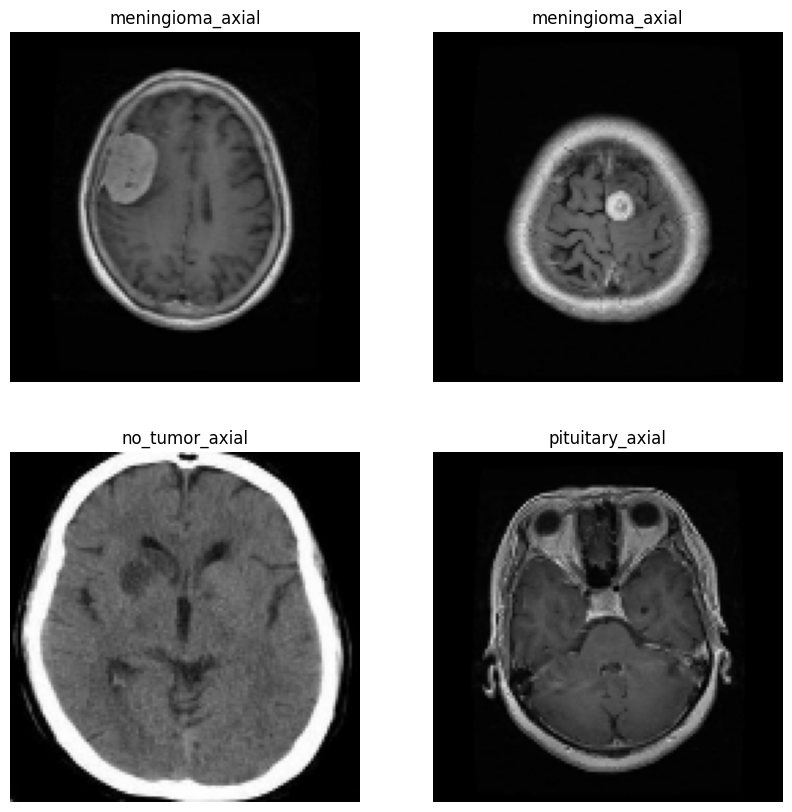

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

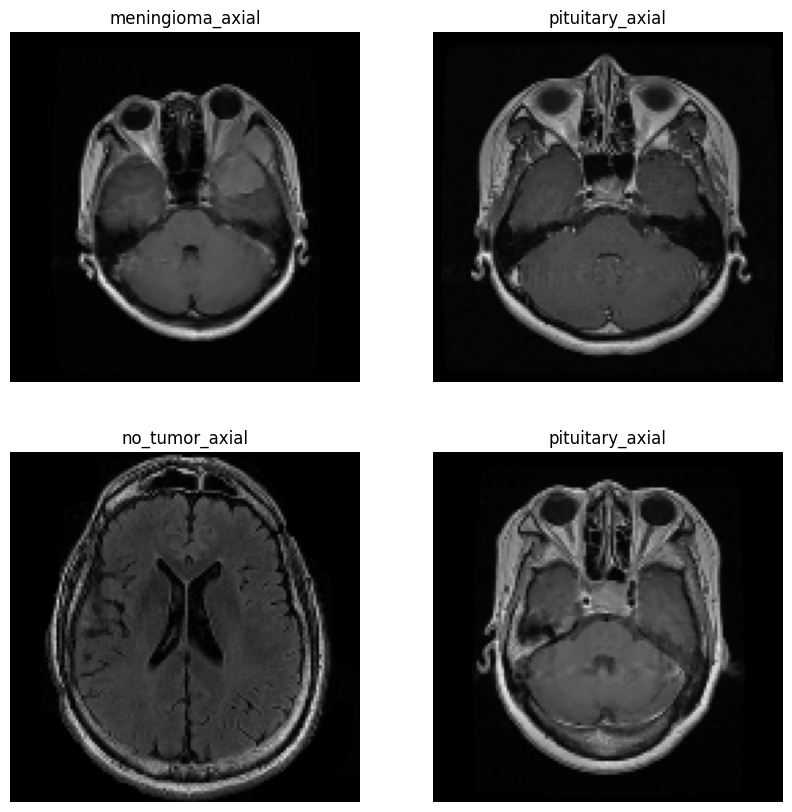

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# **Model 1**
--> overfits training data

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.RandomZoom(height_factor = (-0.2, -0.2),
                             width_factor= (-0.2, 0.2),
                             fill_mode='nearest',
                             interpolation='nearest',
                             seed=None),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


27/27 [==============================] - 46s 2s/step - loss: 1.2712 - accuracy: 0.4276 - val_loss: 1.2682 - val_accuracy: 0.4047
Epoch 2/15
27/27 [==============================] - 51s 2s/step - loss: 1.0150 - accuracy: 0.5829 - val_loss: 1.2037 - val_accuracy: 0.4605
Epoch 3/15
27/27 [==============================] - 42s 2s/step - loss: 0.9253 - accuracy: 0.6188 - val_loss: 1.1577 - val_accuracy: 0.5674
Epoch 4/15
27/27 [==============================] - 42s 2s/step - loss: 0.8978 - accuracy: 0.6362 - val_loss: 1.1557 - val_accuracy: 0.4837
Epoch 5/15
27/27 [==============================] - 42s 2s/step - loss: 0.8977 - accuracy: 0.6280 - val_loss: 1.1490 - val_accuracy: 0.4698
Epoch 6/15
27/27 [==============================] - 41s 2s/step - loss: 0.7878 - accuracy: 0.6721 - val_loss: 1.1470 - val_accuracy: 0.4558
Epoch 7/15
27/27 [==============================] - 42s 2s/step - loss: 0.7883 - accuracy: 0.6721 - val_loss: 1.1045 - val_accuracy: 0.4791
Epoch 8/15
27/27 [=============

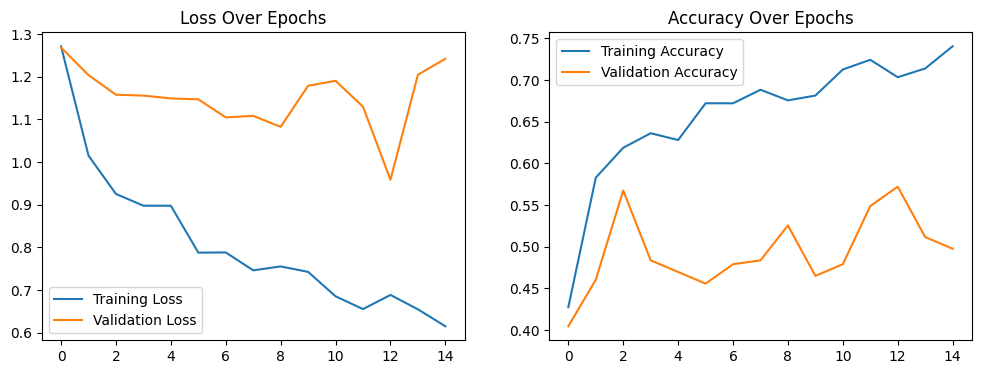

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
#plt.xticks(range(len(history.history['loss'])))
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

#plt.xticks(range(len(history.history['accuracy'])))

plt.show()

# **Model 2**
--> loss and accuracy curves diverge

In [ ]:
num_classes = 4

model_2 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, offset=0.0),
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.RandomZoom(height_factor = (-0.2, -0.2),
                             width_factor= (-0.2, 0.2),
                             fill_mode='nearest',
                             interpolation='nearest',
                             seed=None),

  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
model_2.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_ds, validation_data=val_ds, epochs=15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


27/27 [==============================] - 74s 3s/step - loss: 2.1773 - accuracy: 0.3581 - val_loss: 1.3296 - val_accuracy: 0.2186
Epoch 2/15
27/27 [==============================] - 70s 3s/step - loss: 0.9657 - accuracy: 0.5910 - val_loss: 1.2040 - val_accuracy: 0.4698
Epoch 3/15
27/27 [==============================] - 70s 3s/step - loss: 0.8118 - accuracy: 0.6651 - val_loss: 1.1235 - val_accuracy: 0.4837
Epoch 4/15
27/27 [==============================] - 70s 3s/step - loss: 0.8193 - accuracy: 0.6547 - val_loss: 1.1050 - val_accuracy: 0.4977
Epoch 5/15
27/27 [==============================] - 70s 3s/step - loss: 0.7228 - accuracy: 0.6825 - val_loss: 1.0302 - val_accuracy: 0.5349
Epoch 6/15
27/27 [==============================] - 70s 3s/step - loss: 0.6599 - accuracy: 0.7173 - val_loss: 0.9492 - val_accuracy: 0.5860
Epoch 7/15
27/27 [==============================] - 70s 3s/step - loss: 0.6844 - accuracy: 0.7126 - val_loss: 0.9932 - val_accuracy: 0.5488
Epoch 8/15
27/27 [=============

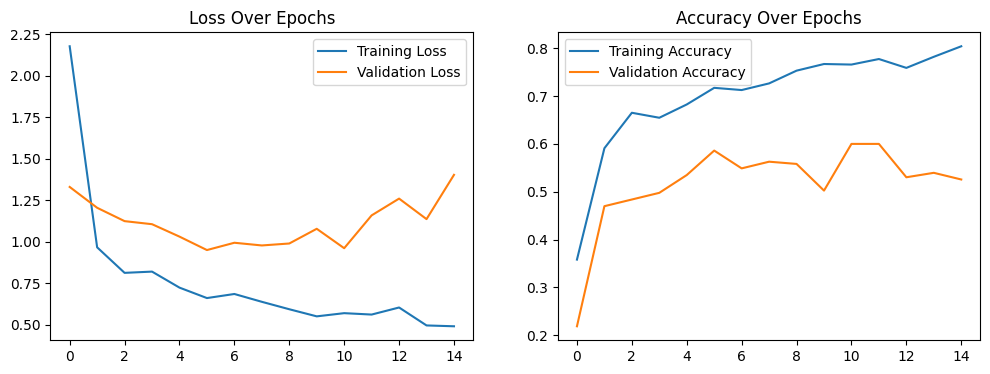

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.legend()
#plt.xticks(range(len(history.history['loss'])))
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

#plt.xticks(range(len(history.history['accuracy'])))

plt.show()

Alternative compiler

In [ ]:
model_2.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
27/27 [==============================] - 74s 3s/step - loss: 0.5495 - accuracy: 0.7555 - val_loss: 1.6602 - val_accuracy: 0.5674
Epoch 2/10
27/27 [==============================] - 70s 3s/step - loss: 0.4687 - accuracy: 0.8088 - val_loss: 1.1524 - val_accuracy: 0.5535
Epoch 3/10
27/27 [==============================] - 72s 3s/step - loss: 0.4692 - accuracy: 0.8065 - val_loss: 1.4155 - val_accuracy: 0.5581
Epoch 4/10
27/27 [==============================] - 72s 3s/step - loss: 0.4629 - accuracy: 0.8019 - val_loss: 1.4250 - val_accuracy: 0.5488
Epoch 5/10
27/27 [==============================] - 72s 3s/step - loss: 0.5016 - accuracy: 0.7810 - val_loss: 1.2969 - val_accuracy: 0.5721
Epoch 6/10
27/27 [==============================] - 73s 3s/step - loss: 0.4058 - accuracy: 0.8192 - val_loss: 1.5927 - val_accuracy: 0.6000
Epoch 7/10
27/27 [==============================] - 73s 3s/step - loss: 0.4105 - accuracy: 0.8285 - val_loss: 1.5520 - val_accuracy: 0.5674
Epoch 8/10
27/27 [==

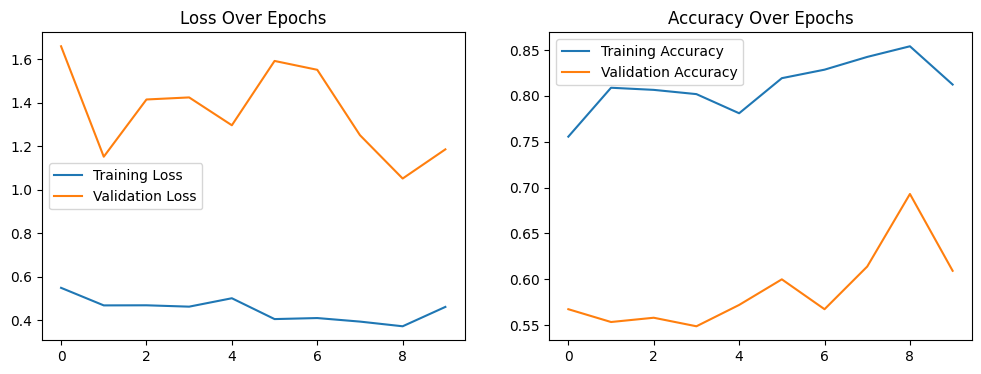

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.legend()
#plt.xticks(range(len(history.history['loss'])))
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

#plt.xticks(range(len(history.history['accuracy'])))

plt.show()

# **Base model Michaela**

In [ ]:
model_MZ = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(scale=1./255, offset=0.0, input_shape = (128, 128, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model_MZ.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_MZ.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
history_MZ = model_MZ.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
27/27 [==============================] - 45s 2s/step - loss: 1.1306 - accuracy: 0.5041 - val_loss: 0.8769 - val_accuracy: 0.6279
Epoch 2/10
27/27 [==============================] - 39s 1s/step - loss: 0.7035 - accuracy: 0.7254 - val_loss: 0.6695 - val_accuracy: 0.7581
Epoch 3/10
27/27 [==============================] - 40s 1s/step - loss: 0.5252 - accuracy: 0.7891 - val_loss: 0.5910 - val_accuracy: 0.7814
Epoch 4/10
27/27 [==============================] - 39s 1s/step - loss: 0.4508 - accuracy: 0.8262 - val_loss: 0.6731 - val_accuracy: 0.7302
Epoch 5/10
27/27 [==============================] - 41s 2s/step - loss: 0.3564 - accuracy: 0.8598 - val_loss: 0.5920 - val_accuracy: 0.7814
Epoch 6/10
27/27 [==============================] - 39s 1s/step - loss: 0.2700 - accuracy: 0.9085 - val_loss: 0.6770 - val_accuracy: 0.7860
Epoch 7/10
27/27 [==============================] - 39s 1s/step - loss: 0.1823 - accuracy: 0.9455 - val_loss: 0.5305 - val_accuracy: 0.8372
Epoch 8/10
27/27 [==

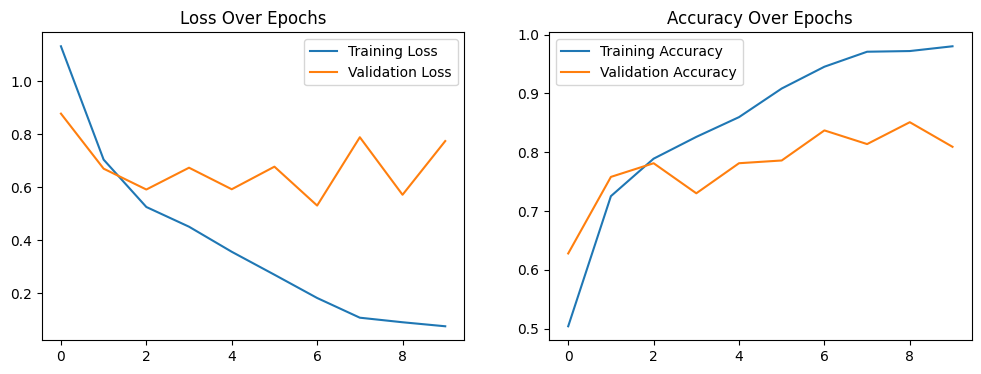

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_MZ.history['loss'], label='Training Loss')
plt.plot(history_MZ.history['val_loss'], label='Validation Loss')
plt.legend()
#plt.xticks(range(len(history.history['loss'])))
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_MZ.history['accuracy'], label='Training Accuracy')
plt.plot(history_MZ.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

#plt.xticks(range(len(history.history['accuracy'])))

plt.show()

In [ ]:
predictions = model_MZ.predict(train_ds)

27/27 [==============================] - 11s 353ms/step


In [ ]:
predicted_categories = tf.argmax(predictions, axis=1)

In [ ]:
true_categories = tf.concat([y for x, y in train_ds], axis=0)

In [ ]:
type(true_categories)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
conf_matrix = confusion_matrix(predicted_categories, true_categories)

In [ ]:
conf_matrix

array([[56, 59, 48, 49],
       [49, 55, 56, 63],
       [51, 50, 60, 53],
       [56, 59, 50, 49]])

Text(0.5, 69.7222222222222, 'Predicted')

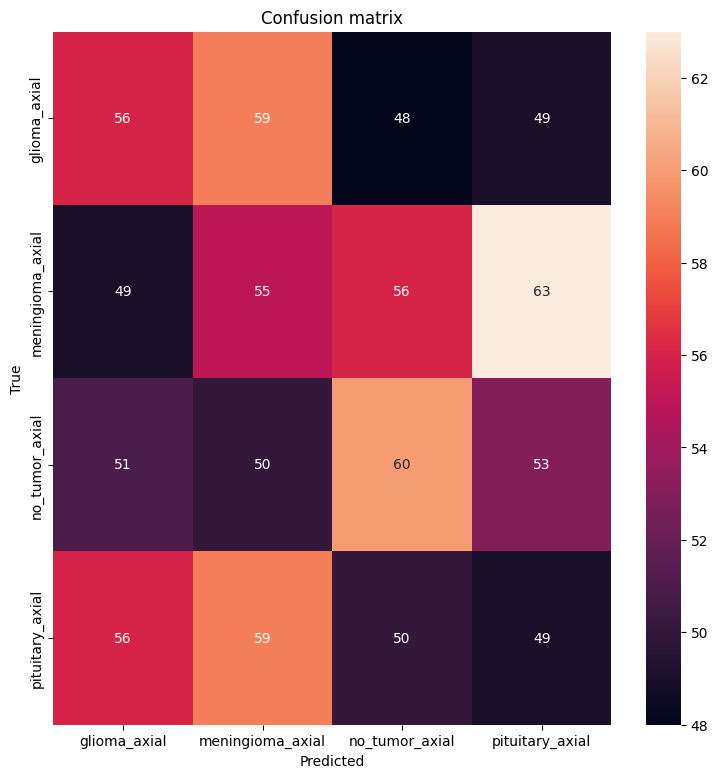

In [ ]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
sns.heatmap(conf_matrix, annot=True,fmt='.0f')
plt.title('Confusion matrix')
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
print(metrics.classification_report(true_categories, predicted_categories))

              precision    recall  f1-score   support

           0       0.26      0.26      0.26       212
           1       0.25      0.25      0.25       223
           2       0.28      0.28      0.28       214
           3       0.23      0.23      0.23       214

    accuracy                           0.25       863
   macro avg       0.26      0.26      0.26       863
weighted avg       0.25      0.25      0.25       863



*Adjusted learning rate*

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_MZ.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_MZ_lr = model_MZ.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
27/27 [==============================] - 52s 2s/step - loss: 0.1028 - accuracy: 0.9641 - val_loss: 0.6017 - val_accuracy: 0.8698
Epoch 2/10
27/27 [==============================] - 44s 2s/step - loss: 0.0300 - accuracy: 0.9884 - val_loss: 0.8144 - val_accuracy: 0.8651
Epoch 3/10
27/27 [==============================] - 39s 1s/step - loss: 0.0251 - accuracy: 0.9942 - val_loss: 0.7791 - val_accuracy: 0.8465
Epoch 4/10
27/27 [==============================] - 43s 2s/step - loss: 0.0134 - accuracy: 0.9988 - val_loss: 0.8752 - val_accuracy: 0.8837
Epoch 5/10
27/27 [==============================] - 38s 1s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.0317 - val_accuracy: 0.8791
Epoch 6/10
27/27 [==============================] - 40s 1s/step - loss: 0.0118 - accuracy: 0.9954 - val_loss: 0.9388 - val_accuracy: 0.8279
Epoch 7/10
27/27 [==============================] - 36s 1s/step - loss: 0.0709 - accuracy: 0.9687 - val_loss: 0.8216 - val_accuracy: 0.8837
Epoch 8/10
27/27 [==

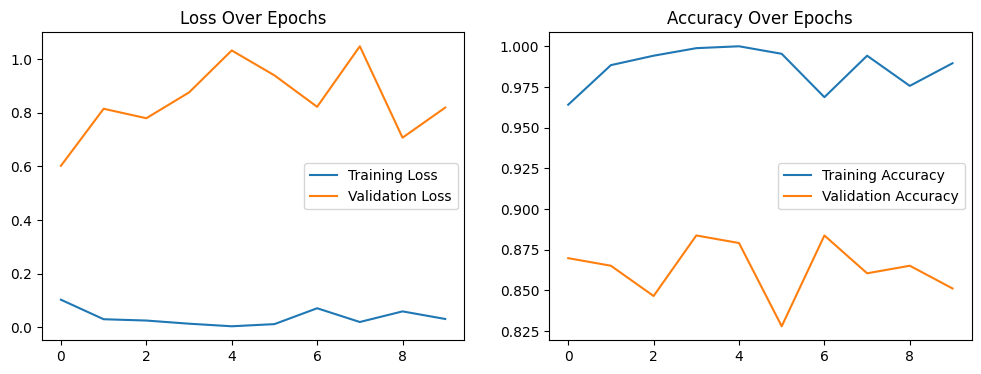

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_MZ_lr.history['loss'], label='Training Loss')
plt.plot(history_MZ_lr.history['val_loss'], label='Validation Loss')
plt.legend()
#plt.xticks(range(len(history.history['loss'])))
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_MZ_lr.history['accuracy'], label='Training Accuracy')
plt.plot(history_MZ_lr.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

#plt.xticks(range(len(history.history['accuracy'])))

plt.show()